In [73]:
#导入必要的库
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt 
from torch import nn

In [74]:
#打开文件
data =pd.read_csv('./iris.csv')

In [75]:
data.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
#将object替换成数字
data['Class']=pd.factorize(data.Class)[0]

In [77]:
data.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
X = data.iloc[:, : -1].values
Y = data.Class.values

In [79]:
#转换成tensor
X = torch.from_numpy(X).type(torch.float32)
Y = torch.from_numpy(Y).type(torch.int64)

In [80]:
#导入必要的库
from sklearn.model_selection import train_test_split

In [81]:
#分成训练样本与测试样本
train_x,test_x,train_y,test_y = train_test_split(X,Y)

In [82]:
#导入库
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [83]:
#分批次训练
batch = 6

In [84]:
train_ds = TensorDataset(train_x,train_y)
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
test_ds = TensorDataset(test_x,test_y)
test_dl = DataLoader(test_ds,batch_size=batch)

In [85]:
#创建模型
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner_1 = nn.Linear(4,32)
        self.liner_2 = nn.Linear(32,32)
        self.liner_3 = nn.Linear(32,3)
    def forward(self,input):
        x = torch.sigmoid(self.liner_1(input))
        x = F.relu(self.liner_2(x))
        x = self.liner_3(x)
        return x

In [86]:
model = Model()

In [87]:
loss_fn = nn.CrossEntropyLoss()

In [88]:
def accuracy(y_pred,y_true):
    y_pred = torch.argmax(y_pred,dim=1)
    acc = ((y_pred == y_true).float().mean())
    return acc

In [89]:
epoches = 300

In [90]:
train_acc = []
test_acc = []

In [91]:
optim = torch.optim.Adam(model.parameters(),lr = 0.0009)

In [92]:
for epoch in range(epoches):
    for x,y in train_dl:
        y_p = model(x)
        loss= loss_fn(y_p,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        train_loss = loss_fn(model(train_x), train_y).data
        train_accuracy = accuracy(model(train_x), train_y)
        test_loss = loss_fn(model(test_x), test_y).data
        test_accuracy = accuracy(model(test_x), test_y)
        print('epoch: ', epoch, '\n'
              'loss;', round(train_loss.item(), 3),'              '
                                
              'accuracy:', round(train_accuracy.item(), 3),'\n'
                               
              'test_loss;', round(test_loss.item(), 3),'              '
                               
              'test_accuracy:', round(test_accuracy.item(), 3)
             )
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)

epoch:  0 
loss; 1.072               accuracy: 0.339 
test_loss; 1.071               test_accuracy: 0.316
epoch:  1 
loss; 1.045               accuracy: 0.688 
test_loss; 1.05               test_accuracy: 0.605
epoch:  2 
loss; 1.015               accuracy: 0.688 
test_loss; 1.027               test_accuracy: 0.605
epoch:  3 
loss; 0.978               accuracy: 0.688 
test_loss; 0.991               test_accuracy: 0.605
epoch:  4 
loss; 0.929               accuracy: 0.688 
test_loss; 0.947               test_accuracy: 0.605
epoch:  5 
loss; 0.867               accuracy: 0.688 
test_loss; 0.89               test_accuracy: 0.605
epoch:  6 
loss; 0.793               accuracy: 0.688 
test_loss; 0.822               test_accuracy: 0.605
epoch:  7 
loss; 0.716               accuracy: 0.688 
test_loss; 0.749               test_accuracy: 0.605
epoch:  8 
loss; 0.642               accuracy: 0.696 
test_loss; 0.678               test_accuracy: 0.632
epoch:  9 
loss; 0.579               accuracy: 0

epoch:  80 
loss; 0.073               accuracy: 0.991 
test_loss; 0.035               test_accuracy: 0.974
epoch:  81 
loss; 0.072               accuracy: 0.991 
test_loss; 0.037               test_accuracy: 0.974
epoch:  82 
loss; 0.071               accuracy: 0.991 
test_loss; 0.036               test_accuracy: 0.974
epoch:  83 
loss; 0.071               accuracy: 0.991 
test_loss; 0.036               test_accuracy: 0.974
epoch:  84 
loss; 0.071               accuracy: 0.982 
test_loss; 0.042               test_accuracy: 0.974
epoch:  85 
loss; 0.071               accuracy: 0.982 
test_loss; 0.04               test_accuracy: 0.974
epoch:  86 
loss; 0.07               accuracy: 0.991 
test_loss; 0.035               test_accuracy: 0.974
epoch:  87 
loss; 0.07               accuracy: 0.991 
test_loss; 0.032               test_accuracy: 0.974
epoch:  88 
loss; 0.069               accuracy: 0.982 
test_loss; 0.038               test_accuracy: 0.974
epoch:  89 
loss; 0.069               ac

epoch:  159 
loss; 0.058               accuracy: 0.991 
test_loss; 0.027               test_accuracy: 0.974
epoch:  160 
loss; 0.058               accuracy: 0.991 
test_loss; 0.026               test_accuracy: 0.974
epoch:  161 
loss; 0.057               accuracy: 0.991 
test_loss; 0.025               test_accuracy: 0.974
epoch:  162 
loss; 0.057               accuracy: 0.991 
test_loss; 0.025               test_accuracy: 0.974
epoch:  163 
loss; 0.057               accuracy: 0.991 
test_loss; 0.025               test_accuracy: 0.974
epoch:  164 
loss; 0.058               accuracy: 0.982 
test_loss; 0.028               test_accuracy: 0.974
epoch:  165 
loss; 0.058               accuracy: 0.991 
test_loss; 0.022               test_accuracy: 1.0
epoch:  166 
loss; 0.058               accuracy: 0.982 
test_loss; 0.028               test_accuracy: 0.974
epoch:  167 
loss; 0.057               accuracy: 0.991 
test_loss; 0.026               test_accuracy: 0.974
epoch:  168 
loss; 0.058      

epoch:  240 
loss; 0.054               accuracy: 0.991 
test_loss; 0.022               test_accuracy: 0.974
epoch:  241 
loss; 0.054               accuracy: 0.991 
test_loss; 0.023               test_accuracy: 0.974
epoch:  242 
loss; 0.054               accuracy: 0.991 
test_loss; 0.022               test_accuracy: 0.974
epoch:  243 
loss; 0.054               accuracy: 0.991 
test_loss; 0.021               test_accuracy: 0.974
epoch:  244 
loss; 0.054               accuracy: 0.991 
test_loss; 0.02               test_accuracy: 1.0
epoch:  245 
loss; 0.056               accuracy: 0.982 
test_loss; 0.027               test_accuracy: 0.974
epoch:  246 
loss; 0.054               accuracy: 0.991 
test_loss; 0.02               test_accuracy: 0.974
epoch:  247 
loss; 0.054               accuracy: 0.991 
test_loss; 0.021               test_accuracy: 0.974
epoch:  248 
loss; 0.056               accuracy: 0.982 
test_loss; 0.027               test_accuracy: 0.974
epoch:  249 
loss; 0.056        

In [93]:
accuracy(model(test_x),test_y)

tensor(1.)

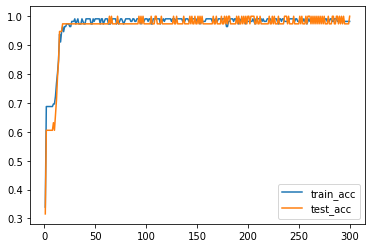

In [94]:
plt.plot(range(1, epoches+1), train_acc, label='train_acc')
plt.plot(range(1, epoches+1), test_acc, label='test_acc')
plt.legend()